<a href="https://colab.research.google.com/github/valixonov04/small_projects/blob/main/Copy_of_05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


1. location qiymatlar "Toshkent Shahar" va "tuman" nomlari kerak emas. Chunki shundog'ham bu qiymatlar aniq.

In [ ]:
location = df.location.copy()

In [ ]:
location

,location
0,"город Ташкент, Юнусабадский район, Юнусабад 8-..."
1,"город Ташкент, Яккасарайский район, 1-й тупик ..."
2,"город Ташкент, Чиланзарский район, Чиланзар 2-..."
3,"город Ташкент, Чиланзарский район, Чиланзар 9-..."
4,"город Ташкент, Чиланзарский район, площадь Актепа"
...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа..."
7561,"город Ташкент, Яшнободский район, 1-й проезд А..."
7562,"город Ташкент, Шайхантахурский район, Зульфиях..."
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И..."


In [ ]:
#Keraksiz qiymatlarni o'chiramiz.
location= location.str.replace("город Ташкент, ", "")
location

,location
0,"Юнусабадский район, Юнусабад 8-й квартал"
1,"Яккасарайский район, 1-й тупик Шота Руставели"
2,"Чиланзарский район, Чиланзар 2-й квартал"
3,"Чиланзарский район, Чиланзар 9-й квартал"
4,"Чиланзарский район, площадь Актепа"
...,...
7560,"Яшнободский район, Городок Авиастроителей 2-й ..."
7561,"Яшнободский район, 1-й проезд Авиасозлар"
7562,"Шайхантахурский район, Зульфияханум"
7563,"Мирзо-Улугбекский район, Буюк Ипак Йули"


In [ ]:
to_replace = df.district.unique()
to_replace = list(to_replace)
to_replace

['Юнусабадский',
 'Яккасарайский',
 'Чиланзарский',
 'Учтепинский',
 'Мирзо-Улугбекский',
 'Яшнободский',
 'Мирабадский',
 'Шайхантахурский',
 'Олмазорский',
 'Сергелийский',
 'Янгихаётский',
 'Бектемирский']

In [ ]:
for i in to_replace:
  location = location.str.replace(i, "")

In [ ]:
location = location.str.replace("район,","")

In [ ]:
location

,location
0,Юнусабад 8-й квартал
1,1-й тупик Шота Руставели
2,Чиланзар 2-й квартал
3,Чиланзар 9-й квартал
4,площадь Актепа
...,...
7560,Городок Авиастроителей 2-й квартал
7561,1-й проезд Авиасозлар
7562,Зульфияханум
7563,Буюк Ипак Йули


In [ ]:
df.location = location

In [ ]:
value_uni = df.location.unique()
value_uni = list(value_uni)
value_uni

['  Юнусабад 8-й квартал',
 '  1-й тупик Шота Руставели',
 '  Чиланзар 2-й квартал',
 '  Чиланзар 9-й квартал',
 '  площадь Актепа',
 '  Чиланзар 6-й квартал',
 '  Чиланзар-16',
 '  Саламатина',
 '  Чиланзар-21',
 '  Чиланзар-8',
 '  Чиланзар-14',
 '  Чиланзар-20',
 '  Чиланзар-17',
 '  Чиланзар-19',
 '  Г9а',
 '  Чиланзар-7',
 '  Феруза',
 '  Чиланзар-9',
 '  Кушбеги',
 '  1-й проезд Заргарлик',
 '  Садыка Азимова (Жуковского) ',
 '  ТТЗ-4',
 '  Афросиёб',
 '  Чиланзар 13-й квартал махалля Кухна-Чупонота',
 '  Чиланзар 11-й квартал',
 '  Чиланзар 13-й квартал',
 '  Чиланзар 5-й квартал',
 '  Чиланзар 30-й квартал',
 '  Чиланзар 7-й квартал',
 '  Чиланзар 26-й квартал',
 '  Чиланзар квартал 20Д',
 '  1-й проезд Лутфи',
 '  Чиланзар 31-й квартал',
 '  Тараса Шевченко',
 '  Юнусабад 18-й квартал',
 '  Бабура',
 '  Гулистон',
 '  Чиланзар квартал И',
 '  Чиланзар 19-й квартал',
 '  Чиланзар 10-й квартал',
 '  Чиланзар 15-й квартал',
 '  Аль-Хорезми-2',
 '  Чиланзар квартал Ц',
 '  Чиланза

In [ ]:
#location ustuni judaham unique ekanligi uchun biz bu ustundan voz kechamiz faqatgina biz tumanlarni o'zidan foydalanamiz.
df = df.drop("location", axis=1)


In [ ]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_num = OneHotEncoder(sparse_output=False).set_output(transform = "pandas")
district = df_num.fit_transform(df.district.to_frame())

In [ ]:
district

,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7563,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop("district", axis=1, inplace=True)

In [ ]:
df = df.join(district)

In [ ]:
df

,rooms,size,level,max_levels,price,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
0,3,57,4,4,52000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,52,4,5,56000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,42,4,4,37000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,65,1,4,49500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,70,3,5,55000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,1,38,5,5,24500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7561,2,49,1,4,32000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7562,2,64,3,9,40000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7563,1,18,1,4,11000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rooms                       7565 non-null   int64  
 1   size                        7565 non-null   object 
 2   level                       7565 non-null   int64  
 3   max_levels                  7565 non-null   int64  
 4   price                       7565 non-null   object 
 5   district_Бектемирский       7565 non-null   float64
 6   district_Мирабадский        7565 non-null   float64
 7   district_Мирзо-Улугбекский  7565 non-null   float64
 8   district_Олмазорский        7565 non-null   float64
 9   district_Сергелийский       7565 non-null   float64
 10  district_Учтепинский        7565 non-null   float64
 11  district_Чиланзарский       7565 non-null   float64
 12  district_Шайхантахурский    7565 non-null   float64
 13  district_Юнусабадский       7565 

In [ ]:
df.price = df.price.astype(int)

ValueError: invalid literal for int() with base 10: 'Договорная'

In [ ]:
#Договорная degan qiymat borligi sabali int bolmadi price. eng odiy yechim buni 0 qilib qo'yish
df.price = df.price.replace("Договорная" , 0)

In [ ]:
df.price = df.price.astype(int)

In [ ]:
#df.sizer = df.sizer.astype(float)

ValueError: could not convert string to float: 'Площадьземли:1сот'

In [ ]:
df[df.sizer == "Площадьземли:1сот"]

,rooms,sizer,level,max_levels,price,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
5347,4,Площадьземли:1сот,3,5,150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.drop(5347, axis = 0,inplace=True)

In [ ]:
df[df.sizer == "Площадьземли:1сот"]

,rooms,sizer,level,max_levels,price,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский


In [ ]:
df.sizer = df.sizer.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7563 entries, 0 to 7564
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rooms                       7563 non-null   int64  
 1   sizer                       7563 non-null   float64
 2   level                       7563 non-null   int64  
 3   max_levels                  7563 non-null   int64  
 4   price                       7563 non-null   int64  
 5   district_Бектемирский       7563 non-null   float64
 6   district_Мирабадский        7563 non-null   float64
 7   district_Мирзо-Улугбекский  7563 non-null   float64
 8   district_Олмазорский        7563 non-null   float64
 9   district_Сергелийский       7563 non-null   float64
 10  district_Учтепинский        7563 non-null   float64
 11  district_Чиланзарский       7563 non-null   float64
 12  district_Шайхантахурский    7563 non-null   float64
 13  district_Юнусабадский       7563 non-n

In [ ]:
df.rename(columns={"size":"sizer"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rooms                       7565 non-null   int64  
 1   size                        7565 non-null   object 
 2   level                       7565 non-null   int64  
 3   max_levels                  7565 non-null   int64  
 4   price                       7565 non-null   int64  
 5   district_Бектемирский       7565 non-null   float64
 6   district_Мирабадский        7565 non-null   float64
 7   district_Мирзо-Улугбекский  7565 non-null   float64
 8   district_Олмазорский        7565 non-null   float64
 9   district_Сергелийский       7565 non-null   float64
 10  district_Учтепинский        7565 non-null   float64
 11  district_Чиланзарский       7565 non-null   float64
 12  district_Шайхантахурский    7565 non-null   float64
 13  district_Юнусабадский       7565 

array([[<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'sizer'}>,
        <Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'max_levels'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'district_Бектемирский'}>,
        <Axes: title={'center': 'district_Мирабадский'}>,
        <Axes: title={'center': 'district_Мирзо-Улугбекский'}>],
       [<Axes: title={'center': 'district_Олмазорский'}>,
        <Axes: title={'center': 'district_Сергелийский'}>,
        <Axes: title={'center': 'district_Учтепинский'}>,
        <Axes: title={'center': 'district_Чиланзарский'}>],
       [<Axes: title={'center': 'district_Шайхантахурский'}>,
        <Axes: title={'center': 'district_Юнусабадский'}>,
        <Axes: title={'center': 'district_Яккасарайский'}>,
        <Axes: title={'center': 'district_Янгихаётский'}>],
       [<Axes: title={'center': 'district_Яшнободский'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

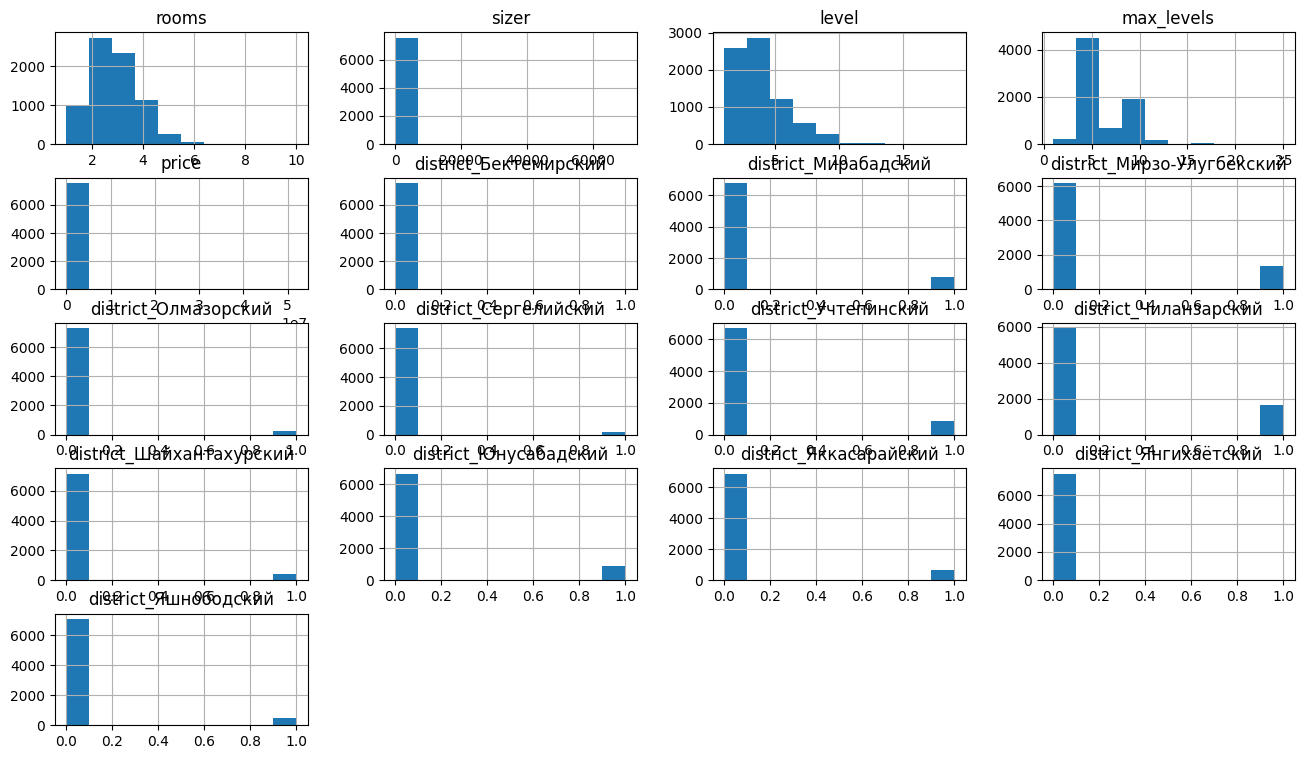

In [ ]:
df.hist(figsize=(16,9))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

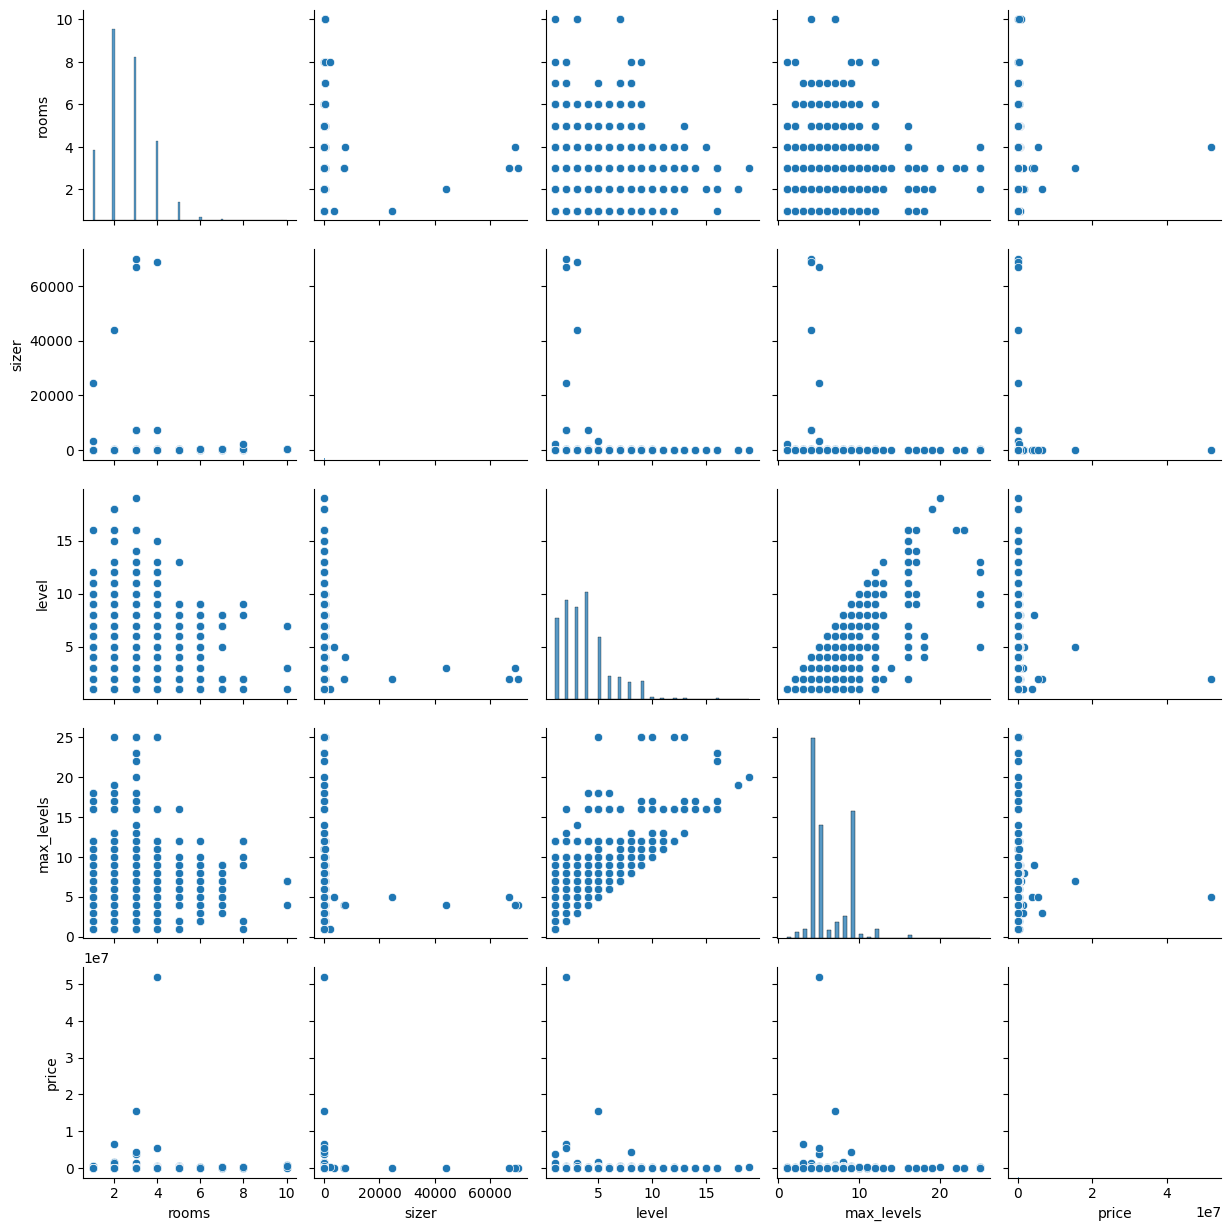

In [ ]:
sns.pairplot(df[["rooms","sizer",'level','max_levels',"price"]])
plt.show()

In [ ]:
df.corrwith(df.price).sort_values(ascending=False)

,0
price,1.000000
rooms,0.055338
district_Учтепинский,0.018860
district_Мирабадский,0.014108
district_Шайхантахурский,0.012493
max_levels,0.010459
sizer,0.001126
district_Яккасарайский,-0.000942
district_Юнусабадский,-0.001052
district_Олмазорский,-0.001462


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, random_state=42 , train_size=0.8)

In [ ]:
train_set

,rooms,sizer,level,max_levels,price,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
7087,2,48.0,4,4,27394,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5256,4,114.0,5,9,82000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2274,4,100.0,5,9,76000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
747,2,30.0,7,9,20900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4597,2,65.0,5,9,42000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,3,79.0,3,4,67000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5227,3,85.0,2,9,75000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5392,4,84.0,5,5,57000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
861,2,61.0,4,5,39000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_set


,rooms,sizer,level,max_levels,price,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
4829,1,36.0,1,5,27000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1130,1,35.0,3,5,25500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6130,3,72.0,2,5,48000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2442,1,41.0,1,5,35000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7104,2,60.0,1,9,46000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5643,3,80.0,4,5,56000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1650,2,65.0,4,4,51000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2355,2,58.0,4,9,39000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7246,2,56.0,9,12,35000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X = train_set.drop("price", axis=1)
y = train_set.price

In [ ]:
X

,rooms,sizer,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
7087,2,48.0,4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5256,4,114.0,5,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2274,4,100.0,5,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
747,2,30.0,7,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4597,2,65.0,5,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,3,79.0,3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5227,3,85.0,2,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5392,4,84.0,5,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
861,2,61.0,4,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.describe()

,rooms,sizer,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
count,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000
mean,2.627438,112.316425,3.714545,6.042314,0.000992,0.100992,0.181322,0.034876,0.023636,0.117190,0.219174,0.053058,0.119008,0.086116,0.002479,0.061157
std,1.082957,1428.400829,2.249006,2.605841,0.031479,0.301343,0.385317,0.183481,0.151926,0.321673,0.413721,0.224167,0.323825,0.280558,0.049735,0.239638
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,65.250000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,85.000000,5.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,70000.000000,19.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax_value = minmax.fit_transform(X)
minmax_value

array([[1.11111111e-01, 6.71438163e-04, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 1.61430878e-03, 2.22222222e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 1.41430592e-03, 2.22222222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 1.18573122e-03, 2.22222222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.11111111e-01, 8.57155102e-04, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.22222222e-01, 1.21430306e-03, 4.44444444e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X_value = pd.DataFrame(minmax_value, columns=X.columns, index=X.index)
X_value

,rooms,sizer,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
7087,0.111111,0.000671,0.166667,0.125000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5256,0.333333,0.001614,0.222222,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2274,0.333333,0.001414,0.222222,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
747,0.111111,0.000414,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4597,0.111111,0.000914,0.222222,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,0.222222,0.001114,0.111111,0.125000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5227,0.222222,0.001200,0.055556,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5392,0.333333,0.001186,0.222222,0.166667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
861,0.111111,0.000857,0.166667,0.166667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_value,y)

LinearRegression()

In [ ]:
X_test_set = test_set.drop("price",axis=1)

In [ ]:
y_predict = LR_model.predict(X_test_set)

In [ ]:
y = test_set.price

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_predict)
print("MSE=",mse)

MSE= 332474566808553.1
